In [7]:
from classMVA import MVA
import numpy as np
import matplotlib.pyplot as plt

# DATOS REALES. IMAGEN POR SATÉLITE


# 1. VALIDACIÓN SIN REGULARIZACIÓN PARA PCA

En primer lugar cargamos los datos:

In [6]:
import urllib2
from pyspark.mllib.regression import LabeledPoint

response = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn")
textdata = response.read()
datos = textdata.split('\n')
print 'La estructura de los datos es: ' + datos[0]


La estructura de los datos es: 92 115 120 94 84 102 106 79 84 102 102 83 101 126 133 103 92 112 118 85 84 103 104 81 102 126 134 104 88 121 128 100 84 107 113 87 3


## 1.1 PCA CON SCIKIT LEARN

Creamos un numpy array con las variables y normalizamos eliminando la media

In [3]:
data_1_sk = np.array(map(lambda x: np.array(map(int, x.split(' ')[:-1])), datos[:-1]))
media = np.mean(data_1_sk, axis=0)
X_pca = data_1_sk - media


Con PCA de ScikitLearn extraemos 15 componentes y los proyectamos

In [9]:
from sklearn.decomposition import PCA

nprojections = 15
pca = PCA(n_components=nprojections)
pca.fit(X_pca)
X_projected_sk = pca.transform(X_pca)

## 1.2 PCA CON LA TOOLBOX 

Creamos un RDD de Labeled Points para PCA de la Toolbox y entrenamos el modelo para 15 componentes 

In [6]:
RDD = sc.parallelize(textdata.split('\n')[:-1]).map(lambda line: line.split(" "))
RDD_labeled=RDD.map(lambda x: LabeledPoint(x[-1],x[0:-1]))
RDD_PCA = RDD_labeled.map(lambda x: x.features)

In [7]:
PCA_model = MVA('PCA','none','None',1e-5,nprojections,1e-8,1e-5,100,30)
PCA_model.fit(RDD_PCA)

(15, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 15
Extracting projection vector 1 out of 15
Extracting projection vector 2 out of 15
Extracting projection vector 3 out of 15
Extracting projection vector 4 out of 15
Extracting projection vector 5 out of 15
Extracting projection vector 6 out of 15
Extracting projection vector 7 out of 15
Extracting projection vector 8 out of 15
Extracting projection vector 9 out of 15
Extracting projection vector 10 out of 15
Extracting projection vector 11 out of 15
Extracting projection vector 12 out of 15
Extracting projection vector 13 out of 15
Extracting projection vector 14 out of 15
(15, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 15
Extracting projection vector 1 out of 15
Extracting projection vector 2 out of 15
Extracting projection vector 3 out of 15
Extracting projection vector 4 out of 15
Extracting projection vector 5 out of 15
Extracting projection vector 6 out of 15
Extracting projection vector 7 out of 1

## 1.3 VISUALIZACIÓN

Dibujamos los vectores de proyección para las dos soluciones: en azul para PCA y en rojo para la Toolbox

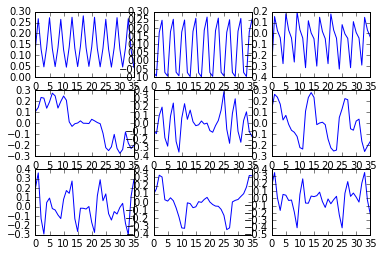

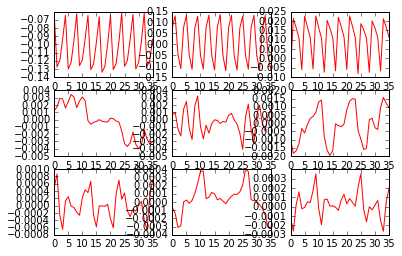

In [10]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(331)
ax1.plot(pca.components_[0,], 'b-')

ax1 = fig1.add_subplot(332)
ax1.plot(pca.components_[1,], 'b-')

ax1 = fig1.add_subplot(333)
ax1.plot(pca.components_[2,], 'b-')

ax1 = fig1.add_subplot(334)
ax1.plot(pca.components_[3,], 'b-')

ax1 = fig1.add_subplot(335)
ax1.plot(pca.components_[4,], 'b-')

ax1 = fig1.add_subplot(336)
ax1.plot(pca.components_[5,], 'b-')

ax1 = fig1.add_subplot(337)
ax1.plot(pca.components_[6,], 'b-')

ax1 = fig1.add_subplot(338)
ax1.plot(pca.components_[7,], 'b-')

ax1 = fig1.add_subplot(339)
ax1.plot(pca.components_[8,], 'b-')


fig2 = plt.figure()

ax1 = fig2.add_subplot(331)
ax1.plot(PCA_model._U[0,], 'r-')

ax1 = fig2.add_subplot(332)
ax1.plot(PCA_model._U[1,], 'r-')

ax1 = fig2.add_subplot(333)
ax1.plot(PCA_model._U[2,], 'r-')

ax1 = fig2.add_subplot(334)
ax1.plot(PCA_model._U[3,], 'r-')

ax1 = fig2.add_subplot(335)
ax1.plot(PCA_model._U[4,], 'r-')

ax1 = fig2.add_subplot(336)
ax1.plot(PCA_model._U[5,], 'r-')

ax1 = fig2.add_subplot(337)
ax1.plot(PCA_model._U[6,], 'r-')

ax1 = fig2.add_subplot(338)
ax1.plot(PCA_model._U[7,], 'r-')

ax1 = fig2.add_subplot(339)
ax1.plot(PCA_model._U[8,], 'r-')


plt.show()


## 1.4 CÁLCULO DE MSE 

En este apartado se va a calcular el mínimo error cuadrático dependiendo de el número de proyecciones extraídas, para PCA de Scikit-Learn y PCA de la Toolbox .

In [11]:
from sklearn.linear_model import LinearRegression

mses_sk = list()

n_targets = 36

for np2 in range(nprojections):
    mse = 0
    X_components_sk = X_projected_sk[:,:np2+1]
    for k in range(n_targets):
        targets = X_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_sk, targets)
        predictions = lm.predict(X_components_sk)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_sk.append(mse)

MSE para 1 proyecciones: 6259.91461541
MSE para 2 proyecciones: 1674.64018781
MSE para 3 proyecciones: 1261.20377487
MSE para 4 proyecciones: 970.887889414
MSE para 5 proyecciones: 725.09093335
MSE para 6 proyecciones: 523.864608692
MSE para 7 proyecciones: 387.465030233
MSE para 8 proyecciones: 325.025865326
MSE para 9 proyecciones: 277.677946905
MSE para 10 proyecciones: 237.304575517
MSE para 11 proyecciones: 208.42397999
MSE para 12 proyecciones: 187.349045486
MSE para 13 proyecciones: 167.387417121
MSE para 14 proyecciones: 149.335091491
MSE para 15 proyecciones: 134.622328256


In [ ]:
from sklearn.linear_model import LinearRegression

X_projected_tb = np.array(PCA_model.predict(RDD_PCA).collect())

X_pca = RDD_PCA.collect()
media = np.mean(X_pca, axis=0)
X_pca = X_pca-media


mses_tb = list()

n_targets = 36

for np2 in range(nprojections):
    mse = 0
    X_components_tb = X_projected_tb[:,:np2+1]
    for k in range(n_targets):
        targets = X_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb, targets)
        predictions = lm.predict(X_components_tb)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb.append(mse)

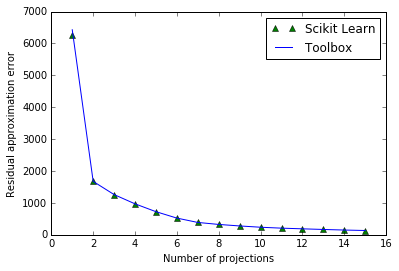

In [13]:

plt.figure()

plt.plot(map(lambda x: x+1, range(nprojections)), mses_sk, 'g^', label='Scikit Learn' )
plt.hold(True)
plt.plot(map(lambda x: x+1, range(nprojections)), mses_tb, 'b', label='Toolbox' )

plt.legend(loc = 1)
plt.xlabel('Number of projections')
plt.ylabel('Residual approximation error')

plt.show()

# 2. PCA VS OPLS (SIN REGULARIZAR)

Volvemos a cargar los datos


In [8]:
import urllib2
from pyspark.mllib.regression import LabeledPoint

response = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn")
textdata = response.read()
RDD = sc.parallelize(textdata.split('\n')[:-1]).map(lambda line: line.split(" "))
RDD_labeled=RDD.map(lambda x: LabeledPoint(x[-1],x[0:-1]))

De los 7 tipos de clases que puede haber, en los datos la clase 6 nunca aparace por lo que vamos a eliminarla

In [9]:
def filter_6 (x):
    if x==7.0:
        return 6.0
    else:
        return x
    

rdd_label= RDD_labeled.map(lambda x: x.label)
rdd_label_new=rdd_label.map(lambda x: filter_6(x))
label=rdd_label_new.distinct().collect()

new=RDD_labeled.map(lambda x: x.features).zip(rdd_label_new)
RDD_labeled_new=new.map(lambda x: LabeledPoint(x[1],x[0]))

RDD_PCA = RDD_labeled.map(lambda x: x.features)

## 2.1 ENTRENAMOS LOS MODELOS

Entrenamos el modelo OPLS

In [10]:
nprojections=5
OPLS_model = MVA('OPLS','none','norm',1e-5,nprojections,1e-8,1e-5,100,30)
OPLS_model.fit(RDD_labeled_new)

(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
Frobenius norm error: 4.19859787006e-05
(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
Frobenius norm error: 2.52423151508e-06


Entrenamos el modelo PCA

In [12]:
nprojections=15
PCA_model = MVA('PCA','none','None',1e-5,nprojections,1e-8,1e-5,100,30)
PCA_model.fit(RDD_PCA)

(15, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 15
Extracting projection vector 1 out of 15
Extracting projection vector 2 out of 15
Extracting projection vector 3 out of 15
Extracting projection vector 4 out of 15
Extracting projection vector 5 out of 15
Extracting projection vector 6 out of 15
Extracting projection vector 7 out of 15
Extracting projection vector 8 out of 15
Extracting projection vector 9 out of 15
Extracting projection vector 10 out of 15
Extracting projection vector 11 out of 15
Extracting projection vector 12 out of 15
Extracting projection vector 13 out of 15
Extracting projection vector 14 out of 15
(15, 36)
(36, 36)
(36, 36)
Extracting projection vector 0 out of 15
Extracting projection vector 1 out of 15
Extracting projection vector 2 out of 15
Extracting projection vector 3 out of 15
Extracting projection vector 4 out of 15
Extracting projection vector 5 out of 15
Extracting projection vector 6 out of 15
Extracting projection vector 7 out of 1

## 2.2 Calculamos el mse con |X-W^TX|^2 PARA OPLS Y PCA

In [16]:
from sklearn.linear_model import LinearRegression

RDD_new_feat=RDD_labeled_new.map(lambda x: x.features)

X_projected_tb_OPLS = np.array(OPLS_model.predict(RDD_new_feat).collect())

X_OPLS = RDD_new_feat.collect()
media = np.mean(X_OPLS, axis=0)
X_OPLS = X_OPLS-media
nprojections=6

mses_tb_opls = list()

n_targets = 36

for np2 in range(nprojections):
    mse = 0
    X_components_tb_opls = X_projected_tb_OPLS[:,:np2+1]
    for k in range(n_targets):
        targets = X_OPLS[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb_opls, targets)
        predictions = lm.predict(X_components_tb_opls)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_opls.append(mse)

MSE para 1 proyecciones: 6311.1192361
MSE para 2 proyecciones: 1783.58120041
MSE para 3 proyecciones: 1263.75290279
MSE para 4 proyecciones: 1008.8302509
MSE para 5 proyecciones: 828.807494242
MSE para 6 proyecciones: 828.807494242


In [14]:
from sklearn.linear_model import LinearRegression

X_projected_tb = np.array(PCA_model.predict(RDD_PCA).collect())

X_pca = RDD_PCA.collect()
media = np.mean(X_pca, axis=0)
X_pca = X_pca-media


nprojections=15
mses_tb = list()

n_targets = 36

for np2 in range(nprojections):
    mse = 0
    X_components_tb = X_projected_tb[:,:np2+1]
    for k in range(n_targets):
        targets = X_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb, targets)
        predictions = lm.predict(X_components_tb)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb.append(mse)

MSE para 1 proyecciones: 6430.87620532
MSE para 2 proyecciones: 1674.79261092
MSE para 3 proyecciones: 1261.28076887
MSE para 4 proyecciones: 970.929522923
MSE para 5 proyecciones: 725.097132501
MSE para 6 proyecciones: 523.865407341
MSE para 7 proyecciones: 387.465528125
MSE para 8 proyecciones: 325.02655713
MSE para 9 proyecciones: 277.679331278
MSE para 10 proyecciones: 237.308986449
MSE para 11 proyecciones: 208.428433766
MSE para 12 proyecciones: 187.391367882
MSE para 13 proyecciones: 167.426886104
MSE para 14 proyecciones: 149.335569162
MSE para 15 proyecciones: 134.646565467


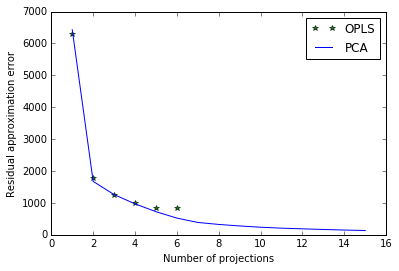

In [19]:
plt.figure()

plt.plot(map(lambda x: x+1, range(6)), mses_tb_opls, 'g*', label='OPLS' )
plt.hold(True)
plt.plot(map(lambda x: x+1, range(15)), mses_tb, 'b', label='PCA' )

plt.legend(loc = 1)
plt.xlabel('Number of projections')
plt.ylabel('Residual approximation error')

plt.show()

## 2.3 Calculamos el mse con |Y-W^TUX|^2

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import label_binarize
from pyspark.mllib.linalg import Vectors

X_projected_tb = np.array(PCA_model.predict(RDD_PCA).collect())

X_pca = RDD_PCA.collect()
media = np.mean(X_pca, axis=0)
X_pca = X_pca-media
set_classes = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Y_pca_label=RDD_labeled_new.map(lambda x: Vectors.dense(label_binarize([x.label], classes=set_classes).flatten()))

Y_pca=np.array(Y_pca_label.collect())
media_y=np.mean(Y_pca,axis=0)

Y_pca=Y_pca-media_y


#print Y_pca.shape()
#print Y_pca
mses_tb_pca = list()
nprojections=15
n_targets = 6

for np2 in range(nprojections):
    mse = 0
    X_components_tb = X_projected_tb[:,:np2+1]
    for k in range(n_targets):
        targets =Y_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb, targets)
        predictions = lm.predict(X_components_tb)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_pca.append(mse)

MSE para 1 proyecciones: 0.682532461254
MSE para 2 proyecciones: 0.572069727411
MSE para 3 proyecciones: 0.381955507683
MSE para 4 proyecciones: 0.381365680781
MSE para 5 proyecciones: 0.379567136424
MSE para 6 proyecciones: 0.378435555424
MSE para 7 proyecciones: 0.377879467238
MSE para 8 proyecciones: 0.377206284845
MSE para 9 proyecciones: 0.377102157505
MSE para 10 proyecciones: 0.376890508298
MSE para 11 proyecciones: 0.375870438702
MSE para 12 proyecciones: 0.37517441726
MSE para 13 proyecciones: 0.373398884002
MSE para 14 proyecciones: 0.369263029525
MSE para 15 proyecciones: 0.368874946632


In [21]:
RDD_new_feat=RDD_labeled_new.map(lambda x: x.features)

X_projected_tb_OPLS = np.array(OPLS_model.predict(RDD_new_feat).collect())

nprojections=5
#X_OPLS = RDD_new_feat.collect()
#media = np.mean(X_OPLS, axis=0)
#X_OPLS = X_OPLS-media
#Y_opls_label=RDD_labeled_new.map(lambda x: Vectors.dense(label_binarize([x.label], classes=set_classes).flatten()))

#Y_opls=np.array(Y_opls_label.collect())
#media=np.mean(Y_opls,axis=0)
#Y_opls=Y_opla-media
Y_opls=Y_pca
mses_tb_opls = list()

n_targets = 6

for np2 in range(nprojections):
    mse = 0
    X_components_tb_opls = X_projected_tb_OPLS[:,:np2+1]
    for k in range(n_targets):
        targets = Y_opls[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb_opls, targets)
        predictions = lm.predict(X_components_tb_opls)
        
        MSE_iter = np.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_opls.append(mse)
    

MSE para 1 proyecciones: 0.688028191414
MSE para 2 proyecciones: 0.562683547375
MSE para 3 proyecciones: 0.379832115991
MSE para 4 proyecciones: 0.377901307755
MSE para 5 proyecciones: 0.376772376092


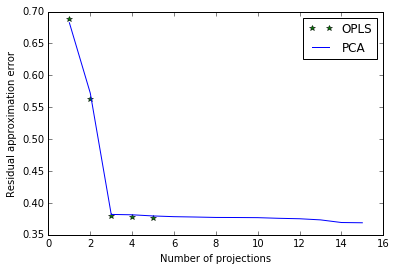

In [22]:
plt.figure()

plt.plot(map(lambda x: x+1, range(5)), mses_tb_opls, 'g*', label='OPLS' )
plt.hold(True)
plt.plot(map(lambda x: x+1, range(15)), mses_tb_pca, 'b', label='PCA' )

plt.legend(loc = 1)
plt.xlabel('Number of projections')
plt.ylabel('Residual approximation error')

plt.show()

# 3. OPLS REGULARIZADO

Cargamos los datos

In [31]:
import urllib2
from pyspark.mllib.regression import LabeledPoint

response = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn")
textdata = response.read()
RDD = sc.parallelize(textdata.split('\n')[:-1]).map(lambda line: line.split(" "))
RDD_labeled=RDD.map(lambda x: LabeledPoint(x[-1],x[0:-1]))

In [32]:
def filter_6 (x):
    if x==7.0:
        return 6.0
    else:
        return x
    

rdd_label= RDD_labeled.map(lambda x: x.label)
rdd_label_new=rdd_label.map(lambda x: filter_6(x))
label=rdd_label_new.distinct().collect()

new=RDD_labeled.map(lambda x: x.features).zip(rdd_label_new)
RDD_labeled_new=new.map(lambda x: LabeledPoint(x[1],x[0]))

In [36]:
term_reg=list()
reg1=0.00001
term_reg.append(reg1)
reg2=0.1
term_reg.append(reg2)
reg3=0.99
term_reg.append(reg3)


In [37]:
nprojections=6
U_opls_reg=list()

for i in range(len(term_reg)):
    
    OPLS_model = MVA('OPLS','l1','None',1e-5,nprojections,term_reg[i],1e-5,100,30)
    OPLS_model.fit(RDD_labeled_new)
    U_opls_reg.append(OPLS_model._U)

(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
Frobenius norm error: 0.00097231698682
(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
Frobenius norm error: 7.24329692564e-05
(5, 36)
(6, 36)
(6, 6)
Extracting projection vector 0 out of 5
Extracting projection vector 1 out of 5
Extracting projection vector 2 out of 5
Extracting projection vector 3 out of 5
Extracting projection vector 4 out of 5
Frobenius norm error: 9.00859

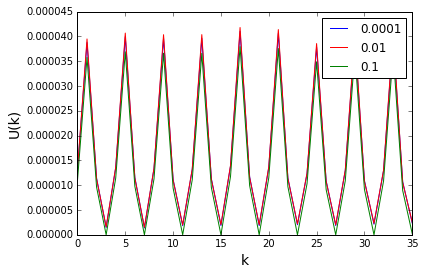

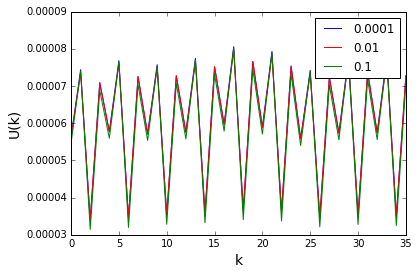

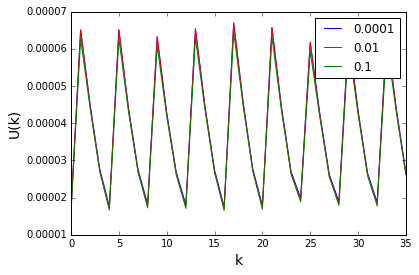

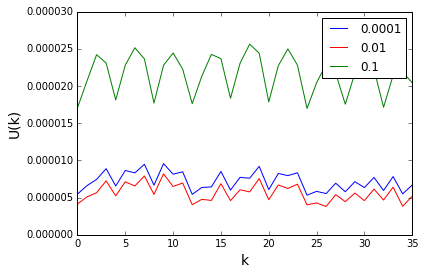

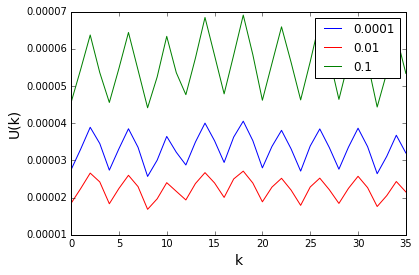

In [35]:
import matplotlib.pyplot as plt

for i in range(5):
    
    plt.figure()
    #ax1 = fig1.add_subplot(331)
    #ax1.plot(pca.components_[0,], 'b-')
    #arreglar
    
    plt.plot(abs(U_opls_reg[0].T[:,i]),'b',label=term_reg[0])
    plt.hold(True)
    plt.plot(abs(U_opls_reg[1].T[:,i]),'r',label=term_reg[1])
    plt.hold(True)
    plt.plot(abs(U_opls_reg[2].T[:,i]),'g',label=term_reg[2])

    plt.legend(loc = 1)

    plt.xlabel('k', fontsize=14)
    plt.ylabel('U(k)', fontsize=14)


    plt.show()
    

# DATOS SINTÉTICOS

# 1. PCA VS OPLS

Se van a crear unos datos sintéticos se podrá modificar en la siguiente celda de ajuste:

In [9]:
import numpy as numpy
#Number of samples
np=105000
#Number of inputs
nx=10
#Number of outputs
ny=5
#Variance of X
VarX=numpy.array([1, 1e-1, 1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9])

In [10]:
X = numpy.random.randn(np,nx) * VarX
W=numpy.random.randn(nx,ny)
Y=X.dot(W)

In [11]:
RDD_X = sc.parallelize(X.tolist())
RDD_Y = sc.parallelize(Y.tolist())

RDD_labeled = RDD_Y.zip(RDD_X)

# 2. ESCALABILIDAD 

In [5]:
samples=numpy.array([0.01,0.1,1])

In [6]:
#RDD for OPLS
RDD_1=RDD_labeled.sample(False, samples[0], 80)
RDD_2=RDD_labeled.sample(False, samples[1], 80)
RDD_3=RDD_labeled
ESC_RDD_OPLS=[RDD_1,RDD_2,RDD_3]

#RDD for PCA
RDD_PCA=RDD_labeled.map(lambda x: x[1])
RDD_1=RDD_PCA.sample(False, samples[0], 80)
RDD_2=RDD_PCA.sample(False, samples[1], 80)
RDD_3=RDD_PCA
ESC_RDD_PCA=[RDD_1,RDD_2,RDD_3]

In [ ]:
from classMVA import MVA
import time 

for i in range(3):
    prueba = MVA('PCA','l1','None',1e-5,10,0.01,1e-3,100,30)
    print 'INIT TIME FOR ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))
    RDD_PCA_ESC=ESC_RDD_PCA[i]
    print RDD_PCA_ESC.count()
    prueba.fit(RDD_PCA_ESC)
    print 'END TIME FOR RDD ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))


In [ ]:
from classMVA import MVA
import time 

for i in range(3):
    prueba = MVA('OPLS','l1','norm',1e-5,10,0.01,1e-3,100,30)
    print 'INIT TIME FOR ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))
    RDD_OPLS_ESC=ESC_RDD_OPLS[i]
    prueba.fit(RDD_OPLS_ESC)
    print 'END TIME FOR RDD ' + str(i+1) + ' samples ' + str(time.localtime( time.time() ))


INIT TIME FOR 1 samples time.struct_time(tm_year=2017, tm_mon=7, tm_mday=10, tm_hour=13, tm_min=57, tm_sec=8, tm_wday=0, tm_yday=191, tm_isdst=1)
(4, 10)
(5, 10)
(5, 5)
Extracting projection vector 0 out of 4
Extracting projection vector 1 out of 4
Extracting projection vector 2 out of 4
Extracting projection vector 3 out of 4
(4, 10)
(5, 10)
(5, 5)
Extracting projection vector 0 out of 4
Extracting projection vector 1 out of 4
Extracting projection vector 2 out of 4
Extracting projection vector 3 out of 4
Frobenius norm error: 3.49724189436e-07
END TIME FOR RDD 1 samples time.struct_time(tm_year=2017, tm_mon=7, tm_mday=10, tm_hour=13, tm_min=57, tm_sec=44, tm_wday=0, tm_yday=191, tm_isdst=1)
INIT TIME FOR 2 samples time.struct_time(tm_year=2017, tm_mon=7, tm_mday=10, tm_hour=13, tm_min=57, tm_sec=44, tm_wday=0, tm_yday=191, tm_isdst=1)
(4, 10)
(5, 10)
(5, 5)
Extracting projection vector 0 out of 4
Extracting projection vector 1 out of 4
Extracting projection vector 2 out of 4
Extracti

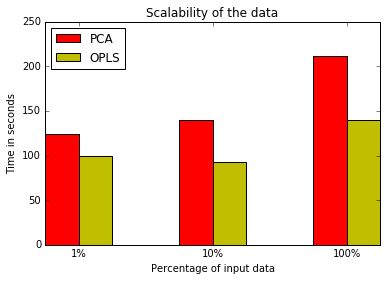

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
timePca = (124,140,211)
timeOpls=(99,93,140)

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, timePca, width, color='r')
rects2 = ax.bar(ind + width, timeOpls, width, color='y')

ax.set_ylabel('Time in seconds')
ax.set_xlabel('Percentage of input data')
ax.set_title('Scalability of the data')
ax.set_xticks(ind+ width)
ax.set_xticklabels(('1%','10%','100%'))


ax.legend((rects1[0], rects2[0]), ('PCA', 'OPLS'),loc=2)

plt.show()

# 3. FUNCIÓN OBJETIVO


## 3.1 FUNCIÓN OBJETIVO |X-W^TUX|^2

Entrenamos los modelos para PCA y OPLS

In [12]:
nprojections=15
PCA_model = MVA('PCA','none','None',1e-5,nprojections,1e-8,1e-5,100,30)
PCA_model.fit(RDD_X)

(9, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 9
Extracting projection vector 1 out of 9
Extracting projection vector 2 out of 9
Extracting projection vector 3 out of 9
Extracting projection vector 4 out of 9
Extracting projection vector 5 out of 9
Extracting projection vector 6 out of 9
Extracting projection vector 7 out of 9
Extracting projection vector 8 out of 9
(9, 10)
(10, 10)
(10, 10)
Extracting projection vector 0 out of 9
Extracting projection vector 1 out of 9
Extracting projection vector 2 out of 9
Extracting projection vector 3 out of 9
Extracting projection vector 4 out of 9
Extracting projection vector 5 out of 9
Extracting projection vector 6 out of 9
Extracting projection vector 7 out of 9
Extracting projection vector 8 out of 9
Frobenius norm error: 4.13224048648e-06


In [13]:
nprojections=5
OPLS_model = MVA('OPLS','none','norm',1e-5,nprojections,1e-8,1e-5,100,30)
OPLS_model.fit(RDD_labeled)

(4, 10)
(5, 10)
(5, 5)
Extracting projection vector 0 out of 4
Extracting projection vector 1 out of 4
Extracting projection vector 2 out of 4
Extracting projection vector 3 out of 4
(4, 10)
(5, 10)
(5, 5)
Extracting projection vector 0 out of 4
Extracting projection vector 1 out of 4
Extracting projection vector 2 out of 4
Extracting projection vector 3 out of 4
Frobenius norm error: 1.64993026645e-08


In [23]:
from sklearn.linear_model import LinearRegression

RDD_new_feat=RDD_labeled.map(lambda x: x[1])

X_projected_tb_OPLS = numpy.array(OPLS_model.predict(RDD_new_feat).collect())

X_OPLS = RDD_new_feat.collect()
media = numpy.mean(X_OPLS, axis=0)
X_OPLS = X_OPLS-media
nprojections=5

mses_tb_opls = list()

n_targets = 10

for np2 in range(nprojections):
    mse = 0
    X_components_tb_opls = X_projected_tb_OPLS[:,:np2+1]
    for k in range(n_targets):
        targets = X_OPLS[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb_opls, targets)
        predictions = lm.predict(X_components_tb_opls)
        
        MSE_iter = numpy.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_opls.append(mse)

MSE para 1 proyecciones: 0.0170927933471
MSE para 2 proyecciones: 0.000590339298898
MSE para 3 proyecciones: 0.000136732711122
MSE para 4 proyecciones: 0.000123002308263
MSE para 5 proyecciones: 0.000123002308263


In [25]:
X_projected_tb = numpy.array(PCA_model.predict(RDD_X).collect())

X_pca = RDD_X.collect()
media = numpy.mean(X_pca, axis=0)
X_pca = X_pca-media


nprojections=10
mses_tb_pca = list()

n_targets = 10

for np2 in range(nprojections):
    mse = 0
    X_components_tb = X_projected_tb[:,:np2+1]
    for k in range(n_targets):
        targets = X_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb, targets)
        predictions = lm.predict(X_components_tb)
        
        MSE_iter = numpy.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_pca.append(mse)

MSE para 1 proyecciones: 0.0101205032124
MSE para 2 proyecciones: 0.000101157521042
MSE para 3 proyecciones: 1.01490030893e-06
MSE para 4 proyecciones: 1.01005020478e-08
MSE para 5 proyecciones: 1.01152916481e-10
MSE para 6 proyecciones: 1.00919649303e-12
MSE para 7 proyecciones: 1.00919649303e-12
MSE para 8 proyecciones: 1.00919649303e-12
MSE para 9 proyecciones: 1.00919649303e-12
MSE para 10 proyecciones: 1.00919649303e-12


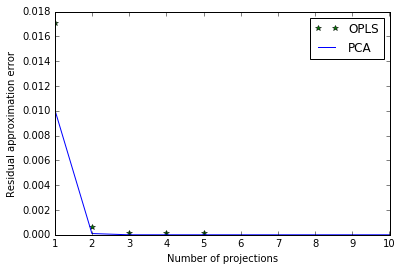

In [26]:
plt.figure()

plt.plot(map(lambda x: x+1, range(5)), mses_tb_opls, 'g*', label='OPLS' )
plt.hold(True)
plt.plot(map(lambda x: x+1, range(10)), mses_tb_pca, 'b', label='PCA' )

plt.legend(loc = 1)
plt.xlabel('Number of projections')
plt.ylabel('Residual approximation error')

plt.show()

## 3.2 FUNCIÓN OBJETIVO |Y-W^TUX|^2

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import label_binarize
from pyspark.mllib.linalg import Vectors

X_projected_tb = numpy.array(PCA_model.predict(RDD_X).collect())

X_pca = RDD_X.collect()
media = numpy.mean(X_pca, axis=0)
X_pca = X_pca-media
#set_classes = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
#Y_pca_label=RDD_labeled_new.map(lambda x: Vectors.dense(label_binarize([x.label], classes=set_classes).flatten()))

Y_pca=numpy.array(RDD_Y.collect())
media_y=numpy.mean(Y_pca,axis=0)

Y_pca=Y_pca-media_y


#print Y_pca.shape()
#print Y_pca
mses_tb_pca = list()
nprojections=10
n_targets = 5

for np2 in range(nprojections):
    mse = 0
    X_components_tb = X_projected_tb[:,:np2+1]
    for k in range(n_targets):
        targets =Y_pca[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb, targets)
        predictions = lm.predict(X_components_tb)
        
        MSE_iter = numpy.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_pca.append(mse)

MSE para 1 proyecciones: 0.0196814990092
MSE para 2 proyecciones: 0.000674475585109
MSE para 3 proyecciones: 9.93183186432e-06
MSE para 4 proyecciones: 2.05173626949e-08
MSE para 5 proyecciones: 2.39694224819e-10
MSE para 6 proyecciones: 5.07564173788e-12
MSE para 7 proyecciones: 5.07564167641e-12
MSE para 8 proyecciones: 5.07564167641e-12
MSE para 9 proyecciones: 5.07564167641e-12
MSE para 10 proyecciones: 5.07564167641e-12


In [36]:
RDD_new_feat=RDD_labeled.map(lambda x: x[1])

X_projected_tb_OPLS = numpy.array(OPLS_model.predict(RDD_new_feat).collect())

nprojections=5
#X_OPLS = RDD_new_feat.collect()
#media = np.mean(X_OPLS, axis=0)
#X_OPLS = X_OPLS-media
#Y_opls_label=RDD_labeled_new.map(lambda x: Vectors.dense(label_binarize([x.label], classes=set_classes).flatten()))

#Y_opls=np.array(Y_opls_label.collect())
#media=np.mean(Y_opls,axis=0)
#Y_opls=Y_opla-media
Y_opls=Y_pca
mses_tb_opls = list()

n_targets = 5

for np2 in range(nprojections):
    mse = 0
    X_components_tb_opls = X_projected_tb_OPLS[:,:np2+1]
    for k in range(n_targets):
        targets = Y_opls[:,k]
        
        #Entrenamos modelo
        lm = LinearRegression(fit_intercept=False)
        lm.fit(X_components_tb_opls, targets)
        predictions = lm.predict(X_components_tb_opls)
        
        MSE_iter = numpy.mean((targets-predictions)**2)
        mse += MSE_iter
    print 'MSE para ' + str(np2+1) + ' proyecciones: ' + str(mse)
    mses_tb_opls.append(mse)

MSE para 1 proyecciones: 0.00244085084805
MSE para 2 proyecciones: 0.000860987922917
MSE para 3 proyecciones: 0.000333386899889
MSE para 4 proyecciones: 0.000290804403907
MSE para 5 proyecciones: 0.000290804403907


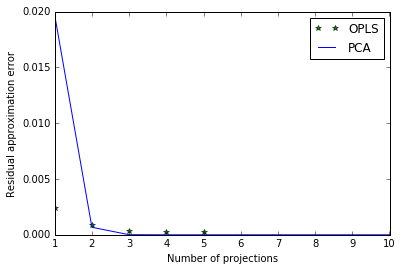

In [37]:
plt.figure()

plt.plot(map(lambda x: x+1, range(5)), mses_tb_opls, 'g*', label='OPLS' )
plt.hold(True)
plt.plot(map(lambda x: x+1, range(10)), mses_tb_pca, 'b', label='PCA' )

plt.legend(loc = 1)
plt.xlabel('Number of projections')
plt.ylabel('Residual approximation error')

plt.show()